In [83]:
import pandas as pd


In [84]:
import sqlite3


In [85]:
# Connect to the database

con = sqlite3.connect('/Users/jacobcrawford/PycharmProjects/Learn_Web_Scraping/lotto_numbers')

In [87]:
# run sql
sql_query = pd.read_sql('select first, second, third, fourth, fifth from lotto_numbers', con)

In [88]:
# convert sql to DataFrame
df = pd.DataFrame(sql_query, columns=["first", "second", "third", "fourth", "fifth"])

In [89]:
df.median(numeric_only=True)

first      6.0
second    14.0
third     23.0
fourth    31.0
fifth     40.0
dtype: float64

In [90]:
df.shape

(7212, 5)

In [120]:
df['first'].value_counts()

first
1     802
2     749
3     637
4     563
5     549
6     495
7     437
8     393
9     353
10    306
11    288
12    231
13    214
14    184
15    164
16    149
17    123
18    107
19     78
20     75
21     62
23     53
22     53
24     30
25     27
27     21
26     17
29     13
30     12
28     11
31      7
32      2
38      2
34      2
33      2
35      1
Name: count, dtype: int64

In [121]:
df['second'].value_counts()

second
13    375
10    365
14    361
12    360
15    347
11    344
9     337
7     327
16    300
8     299
18    296
19    294
17    287
6     277
20    265
5     224
22    214
24    213
21    204
4     193
23    191
25    158
26    142
3     141
27    120
28    113
2      78
29     76
30     72
31     57
32     53
33     47
35     22
36     21
34     19
37     11
38      5
39      3
42      1
Name: count, dtype: int64

In [122]:
df.isnull().sum()

first     0
second    0
third     0
fourth    0
fifth     0
dtype: int64

In [123]:

import numpy as np
import matplotlib.pyplot as plt  # To visualize
#import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [126]:
x = df[['second', 'third', 'fourth', 'fifth']]
y  = df['first']

print(x.shape)
print(y.shape)

(7212, 4)
(7212,)


In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [128]:
type(X_train)
X_train.shape

(5048, 4)

In [129]:
type(y_train)

pandas.core.series.Series

In [130]:
y_train.shape

(5048,)

In [131]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [132]:
predictions_as_ints = []
for i in predictions:
    predictions_as_ints.append(i.round())

ValueError: x and y must be the same size

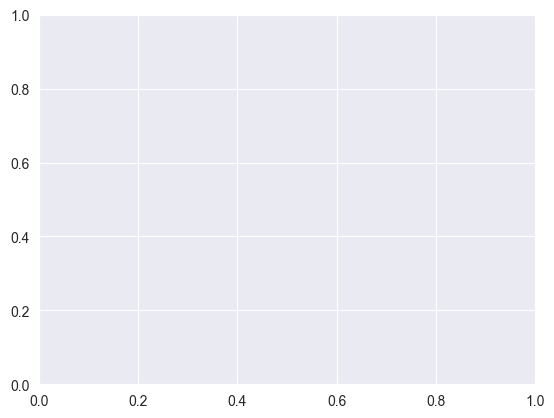

In [133]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions_as_ints, color='red')
plt.show()

In [60]:
from sklearn.metrics import accuracy_score
accruacy = accuracy_score(y_test, predictions_as_ints)
print(accruacy)

1.0


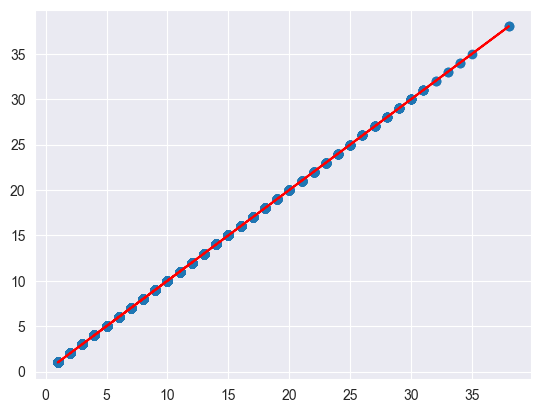

In [23]:


X = df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()